# **Import necessary packages**

In [1]:
%matplotlib inline 
import numpy as np 
import scipy as sp 
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import pandas as pd 
from pandas.tools.plotting import scatter_matrix
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.metrics import roc_curve, auc
import scikitplot as skplt
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

/home/angps/anaconda3/envs/angps/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/angps/anaconda3/envs/angps/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# **Import dataset**

In [2]:
direc="/home/angps/Documents/WorldCupPrediction/cleaned dataset/"
results = pd.read_csv(direc + "cleaned_matches.csv")
results = results.drop(["Unnamed: 0"],axis=1)
results.head()

,date,home_team,away_team,home_score,away_score,country,neutral,impt,home_ranking,home_total_points,home_prev_points,home_rank_change,home_cur_year_avg_weighted,home_last_year_avg_weighted,home_2_year_avg_weighted,home_3_year_avg_weighted,away_ranking,away_total_points,away_prev_points,away_rank_change,away_cur_year_avg_weighted,away_last_year_avg_weighted,away_2_year_avg_weighted,away_3_year_avg_weighted,diff_in_ranking,home_mean_weighted_over_years,away_mean_weighted_over_years,diff_in_mean_weighted_over_years,Result
0,2011-09,Poland,Mexico,1,1,2,0,0,65.0,495.53,498.0,0.0,265.17,69.30,103.32,57.74,20.0,866.38,864.0,0.0,485.18,166.50,142.41,72.29,45.0,123.8825,216.5950,-92.7125,1
1,2011-09,Argentina,Nigeria,3,1,0,1,0,10.0,1024.16,1017.0,-1.0,369.67,422.60,136.81,95.08,43.0,613.45,659.0,-5.0,237.32,203.51,90.37,82.25,-33.0,256.0400,153.3625,102.6775,2
2,2011-09,Poland,Germany,2,2,2,0,0,65.0,495.53,498.0,0.0,265.17,69.30,103.32,57.74,3.0,1289.99,1330.0,0.0,557.21,460.73,148.20,123.85,62.0,123.8825,322.4975,-198.6150,1
3,2011-09,Saudi Arabia,Australia,1,3,2,0,1,97.0,359.41,372.0,-10.0,138.11,100.13,61.61,59.56,19.0,881.63,837.0,3.0,422.74,225.90,148.18,84.81,78.0,89.8525,220.4075,-130.5550,0
4,2011-09,Argentina,Brazil,0,0,2,0,0,10.0,1024.16,1017.0,-1.0,369.67,422.60,136.81,95.08,7.0,1131.52,1156.0,-1.0,377.18,331.71,313.65,108.98,3.0,256.0400,282.8800,-26.8400,1


In [3]:
x = results.loc[:,["country","impt","home_rank_change","away_rank_change","diff_in_ranking","diff_in_mean_weighted_over_years"]]
y=results.loc[:,"Result"]

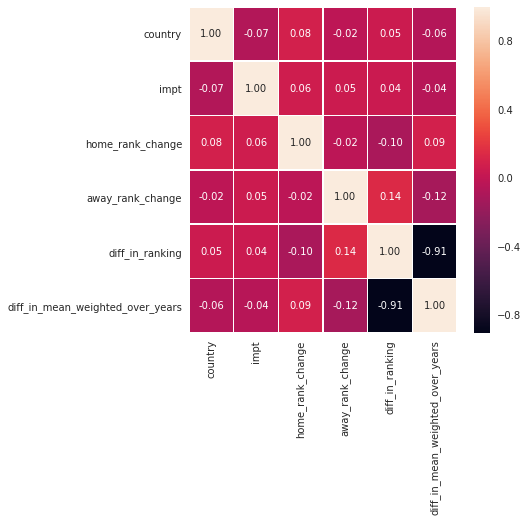

In [4]:
f,ax = plt.subplots(figsize=(6,6))
sns.heatmap(x.corr(), annot=True, linewidths=0.5, fmt= '.2f',ax=ax)

# **Splitting into training and test set**

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [6]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

In [7]:
def train_acc_score(model):
    return round(np.mean(cross_val_score(model,x_train,y_train,cv=k_fold,scoring="accuracy")),2)
def test_acc_score(model):
    return round(accuracy_score(y_test, model.predict(x_test)),2)
def train_prec_score(model):
    return round(precision_score(y_train,model.predict(x_train),average='macro'),2)
def test_prec_score(model):
    return round(precision_score(y_test,model.predict(x_test),average='macro'),2)
def train_f1(model):
    return round(f1_score(y_train,model.predict(x_train),average='macro'),2)
def test_f1(model):
    return round(f1_score(y_test,model.predict(x_test),average='macro'),2)
def confusion_matrix_model(model_used):
    cm=confusion_matrix(y_test,model_used.predict(x_test))
    col=["Predicted Away Win","Predicted Draw","Predicted Home Win"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Away Win","Predicted Draw","Predicted Home Win"]
    cm.index=["Actual Away Win","Actual Draw","Actual Home Win"]
    #cm[col]=np(cm[col])
    return cm.T
def confusion_matrix_model_train(model_used):
    cm=confusion_matrix(y_train,model_used.predict(x_train))
    col=["Predicted Away Win","Predicted Draw","Predicted Home Win"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Away Win","Predicted Draw","Predicted Home Win"]
    cm.index=["Actual Away Win","Actual Draw","Actual Home Win"]
    #cm[col]=np(cm[col])
    return cm.T

    
def importance_of_features(model):
    features = pd.DataFrame()
    features['feature'] = x_train.columns
    features['importance'] = model.feature_importances_
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)
    return features.plot(kind='barh', figsize=(10,10))

Optimised models using GridSearchCV based on F1 score. F1 score gives a weighted average between precisiona and accuracy/recall. It tells you how precise your classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances).

I have typed in some of the optimised parameters based on the GridSearchCV code, then commented out the GridSearchCV codes to make the notebook run faster.

**1. Logistic Regression (Lasso)**

In [8]:
param_grid = dict(C=(0.0001,0.001,0.005,0.01,0.1,0.5,1))
log_reg1 = GridSearchCV(LogisticRegression(penalty="l1"),param_grid=param_grid,scoring="f1_macro")
#log_reg1=LogisticRegression(penalty="l1")
log_reg1.fit(x_train,y_train)
#predicted=log_reg1.predict(x_test)
print(log_reg1.best_params_)
print("In-sample accuracy: " + str(train_acc_score(log_reg1)))
print("Test accuracy: " + str(test_acc_score(log_reg1)))
print ("In-sample Precision Score: " + str(train_prec_score(log_reg1)))
print ("Test Precision Score: " + str(test_prec_score(log_reg1)))
print ("In-sample F1 Score: " + str(train_f1(log_reg1)))
print ("Test F1 Score: " + str(test_f1(log_reg1)))
confusion_matrix_model_train(log_reg1)

{'C': 0.5}
In-sample accuracy: 0.58
Test accuracy: 0.48
In-sample Precision Score: 0.64
Test Precision Score: 0.3
In-sample F1 Score: 0.47
Test F1 Score: 0.35


,Actual Away Win,Actual Draw,Actual Home Win
Predicted Away Win,63,30,21
Predicted Draw,1,6,1
Predicted Home Win,46,46,150


**2. Logistic Regression (Ridge)**

In [9]:
param_grid = dict(C=(0.0001,0.001,0.005,0.01,0.1,0.5,1))
log_reg2 = GridSearchCV(LogisticRegression(penalty="l2"),param_grid=param_grid,scoring="f1_macro")
#log_reg2=LogisticRegression(penalty="l2",C=0.01)
log_reg2.fit(x_train,y_train)
predicted=log_reg2.predict(x_test)
print(log_reg2.best_params_)
print("In-sample accuracy: " + str(train_acc_score(log_reg2)))
print("Test accuracy: " + str(test_acc_score(log_reg2)))
print ("In-sample Precision Score: " + str(train_prec_score(log_reg2)))
print ("Test Precision Score: " + str(test_prec_score(log_reg2)))
print ("In-sample F1 Score: " + str(train_f1(log_reg2)))
print ("Test F1 Score: " + str(test_f1(log_reg2)))
confusion_matrix_model_train(log_reg2)

{'C': 0.5}
In-sample accuracy: 0.59
Test accuracy: 0.46
In-sample Precision Score: 0.57
Test Precision Score: 0.28
In-sample F1 Score: 0.47
Test F1 Score: 0.33


,Actual Away Win,Actual Draw,Actual Home Win
Predicted Away Win,63,30,20
Predicted Draw,2,6,3
Predicted Home Win,45,46,149


**3. SVM (RBF Kernel)**

In [10]:
#param_grid = dict(C=(0.001,0.01,0.1,0.5,1,2),gamma=(0.001,0.01,0.1,0.5,1,2))
#svc_rbf = GridSearchCV(SVC(kernel="rbf",random_state=0),param_grid=param_grid,scoring="f1_macro")
svc_rbf = SVC(kernel='rbf', gamma=0.001, C=0.5,random_state=0)
svc_rbf.fit(x_train, y_train)
#print(svc_rbf.best_params_)
print("In-sample accuracy: " + str(train_acc_score(svc_rbf)))
print("Test accuracy: " + str(test_acc_score(svc_rbf)))
print ("In-sample Precision Score: " + str(train_prec_score(svc_rbf)))
print ("Test Precision Score: " + str(test_prec_score(svc_rbf)))
print ("In-sample F1 Score: " + str(train_f1(svc_rbf)))
print ("Test F1 Score: " + str(test_f1(svc_rbf)))
confusion_matrix_model_train(svc_rbf)

In-sample accuracy: 0.55
Test accuracy: 0.47
In-sample Precision Score: 0.38
Test Precision Score: 0.29
In-sample F1 Score: 0.42
Test F1 Score: 0.34


,Actual Away Win,Actual Draw,Actual Home Win
Predicted Away Win,57,29,18
Predicted Draw,0,0,0
Predicted Home Win,53,53,154


**4. SVM (Linear Kernel)**

In [11]:
#param_grid = dict(C=(0.001,0.01,0.1,0.5,1,2),gamma=(0.001,0.01,0.1,0.5,1,2))
#svc_lin= GridSearchCV(SVC(kernel="linear",random_state=0),param_grid=param_grid,scoring="f1_macro")
svc_lin = SVC(kernel='linear', gamma=0.001, C=0.1,random_state=0)
svc_lin.fit(x_train, y_train)
#print(svc_lin.best_params_)
print("In-sample accuracy: " + str(train_acc_score(svc_lin)))
print("Test accuracy: " + str(test_acc_score(svc_lin)))
print ("In-sample Precision Score: " + str(train_prec_score(svc_lin)))
print ("Test Precision Score: " + str(test_prec_score(svc_lin)))
print ("In-sample F1 Score: " + str(train_f1(svc_lin)))
print ("Test F1 Score: " + str(test_f1(svc_lin)))
confusion_matrix_model_train(svc_lin)

In-sample accuracy: 0.56
Test accuracy: 0.5
In-sample Precision Score: 0.72
Test Precision Score: 0.31
In-sample F1 Score: 0.46
Test F1 Score: 0.37


,Actual Away Win,Actual Draw,Actual Home Win
Predicted Away Win,65,34,24
Predicted Draw,0,4,0
Predicted Home Win,45,44,148


**5. K-Nearest Neighbour**

In [12]:
#param_grid = dict(n_neighbors=np.arange(10,70),weights=("uniform","distance"),p=(1,2))
#KNN = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,scoring="f1_macro")
KNN=KNeighborsClassifier(n_neighbors=16,p=1,weights='uniform')
KNN.fit(x_train,y_train)
predicted=KNN.predict(x_test)
#print(KNN.best_params_)
print("In-sample accuracy: " + str(train_acc_score(KNN)))
print("Test accuracy: " + str(test_acc_score(KNN)))
print ("In-sample Precision Score: " + str(train_prec_score(KNN)))
print ("Test Precision Score: " + str(test_prec_score(KNN)))
print ("In-sample F1 Score: " + str(train_f1(KNN)))
print ("Test F1 Score: " + str(test_f1(KNN)))
confusion_matrix_model_train(KNN)

In-sample accuracy: 0.54
Test accuracy: 0.46
In-sample Precision Score: 0.54
Test Precision Score: 0.34
In-sample F1 Score: 0.5
Test F1 Score: 0.35


,Actual Away Win,Actual Draw,Actual Home Win
Predicted Away Win,62,31,18
Predicted Draw,9,11,7
Predicted Home Win,39,40,147


**6. Decision Tree**

In [13]:
#param_grid = dict(max_depth=np.arange(4,10),min_samples_leaf=np.arange(1,8),min_samples_split=np.arange(2,8),max_leaf_nodes=np.arange(30,100,10))
#Dec_tree = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,scoring="f1_macro")
Dec_tree=DecisionTreeClassifier(max_depth= 8, max_leaf_nodes= 40, min_samples_leaf= 1, min_samples_split= 7)
Dec_tree.fit(x_train,y_train)
predicted=Dec_tree.predict(x_test)
#print(Dec_tree.best_params_)
print("In-sample accuracy: " + str(train_acc_score(Dec_tree)))
print("Test accuracy: " + str(test_acc_score(Dec_tree)))
print ("In-sample Precision Score: " + str(train_prec_score(Dec_tree)))
print ("Test Precision Score: " + str(test_prec_score(Dec_tree)))
print ("In-sample F1 Score: " + str(train_f1(Dec_tree)))
print ("Test F1 Score: " + str(test_f1(Dec_tree)))
confusion_matrix_model_train(Dec_tree)

In-sample accuracy: 0.43
Test accuracy: 0.47
In-sample Precision Score: 0.75
Test Precision Score: 0.4
In-sample F1 Score: 0.73
Test F1 Score: 0.4


,Actual Away Win,Actual Draw,Actual Home Win
Predicted Away Win,75,15,7
Predicted Draw,6,49,13
Predicted Home Win,29,18,152


**7. Random Forest**

In [14]:
#param_grid = dict(max_depth=np.arange(3,10),min_samples_leaf=np.arange(1,10),min_samples_split=np.arange(2,6),max_leaf_nodes=np.arange(50,120,10))
#param_grid = dict(n_estimators = np.arange(50,500,50))
#ranfor = GridSearchCV(RandomForestClassifier(max_depth= 7, max_leaf_nodes=50, min_samples_leaf= 7, min_samples_split= 4,random_state=0),param_grid=param_grid,scoring="f1_macro")
ranfor = RandomForestClassifier(n_estimators=50,max_depth= 7, max_leaf_nodes=50, min_samples_leaf= 7, min_samples_split= 4,random_state=0)
ranfor.fit(x_train,y_train)
predicted=ranfor.predict(x_test)
#print(ranfor.best_params_)
print("In-sample accuracy: " + str(train_acc_score(ranfor)))
print("Test accuracy: " + str(test_acc_score(ranfor)))
print ("In-sample Precision Score: " + str(train_prec_score(ranfor)))
print ("Test Precision Score: " + str(test_prec_score(ranfor)))
print ("In-sample F1 Score: " + str(train_f1(ranfor)))
print ("Test F1 Score: " + str(test_f1(ranfor)))
confusion_matrix_model_train(ranfor)

In-sample accuracy: 0.55
Test accuracy: 0.49
In-sample Precision Score: 0.73
Test Precision Score: 0.42
In-sample F1 Score: 0.55
Test F1 Score: 0.38


,Actual Away Win,Actual Draw,Actual Home Win
Predicted Away Win,74,26,19
Predicted Draw,1,11,0
Predicted Home Win,35,45,153


**8. XGBoosting**

In [22]:
#param_grid = dict(n_estimators=np.arange(50,500,50),max_depth=np.arange(6,12),learning_rate=(0.0001,0.001,0.01,0.1))
#xgclass = GridSearchCV(xgb.XGBClassifier(random_state=0),param_grid=param_grid,scoring="f1_macro")
xgclass = xgb.XGBClassifier(max_depth=9, n_estimators=450, learning_rate=0.01)
xgclass.fit(x_train,y_train)
predicted=xgclass.predict(x_test)
#print(xgclass.best_params_)
print("In-sample accuracy: " + str(train_acc_score(xgclass)))
print("Test accuracy: " + str(test_acc_score(xgclass)))
print ("In-sample Precision Score: " + str(train_prec_score(xgclass)))
print ("Test Precision Score: " + str(test_prec_score(xgclass)))
print ("In-sample F1 Score: " + str(train_f1(xgclass)))
print ("Test F1 Score: " + str(test_f1(xgclass)))
confusion_matrix_model_train(xgclass)

In-sample accuracy: 0.49
Test accuracy: 0.52
In-sample Precision Score: 0.99
Test Precision Score: 0.5
In-sample F1 Score: 0.98
Test F1 Score: 0.48


,Actual Away Win,Actual Draw,Actual Home Win
Predicted Away Win,110,0,0
Predicted Draw,0,78,1
Predicted Home Win,0,4,171


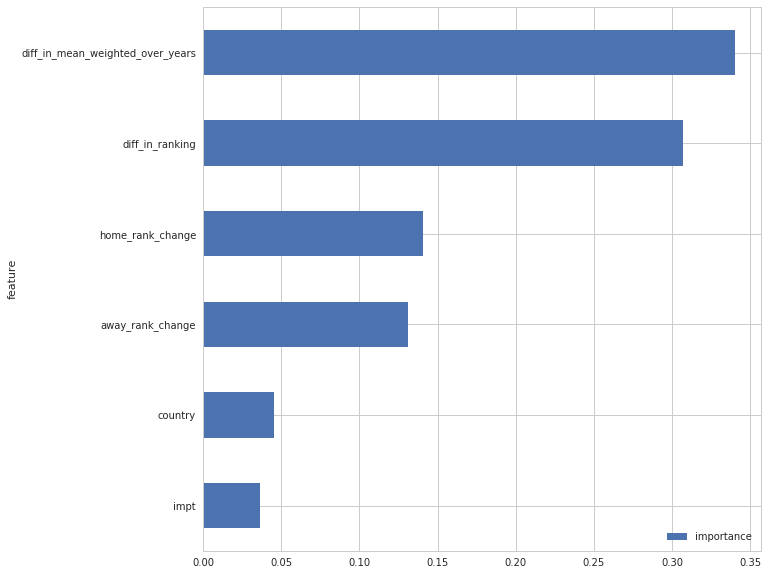

In [18]:
importance_of_features(xgclass)

# **Evaluation**

In [16]:
Classifiers=["Logistic Regression (Lasso)","Logistic Regression (Ridge)","Support Vector Machine (RBF)","Support Vector Machine(Linear)","K-Nearest Neighbours","Decision Tree","Random Forest","XGBoost"]
in_sample_acc=[round(train_acc_score(x),2) for x in [log_reg1,log_reg2,svc_rbf,svc_lin,KNN,Dec_tree,ranfor,xgclass]]
test_acc=[round(test_acc_score(x),2) for x in [log_reg1,log_reg2,svc_rbf,svc_lin,KNN,Dec_tree,ranfor,xgclass]]
train_prec = [round(train_prec_score(x),2) for x in [log_reg1,log_reg2,svc_rbf,svc_lin,KNN,Dec_tree,ranfor,xgclass]]
test_prec = [round(test_prec_score(x),2) for x in [log_reg1,log_reg2,svc_rbf,svc_lin,KNN,Dec_tree,ranfor,xgclass]]
trainf1 = [train_f1(x) for x in [log_reg1,log_reg2,svc_rbf,svc_lin,KNN,Dec_tree,ranfor,xgclass]]
testf1 = [test_f1(x) for x in [log_reg1,log_reg2,svc_rbf,svc_lin,KNN,Dec_tree,ranfor,xgclass]]
cols=["Classifier","Training Accuracy","Test Accuracy","Training Precision","Test Precision","Training F1 Score","Test F1 Score"]
profit_results = pd.DataFrame(columns=cols)
profit_results["Classifier"]=Classifiers
profit_results["Training Accuracy"]=in_sample_acc
profit_results["Test Accuracy"]=test_acc
profit_results["Training Precision"]=train_prec
profit_results["Test Precision"]=test_prec
profit_results["Training F1 Score"]=trainf1
profit_results["Test F1 Score"]=testf1
profit_results

,Classifier,Training Accuracy,Test Accuracy,Training Precision,Test Precision,Training F1 Score,Test F1 Score
0,Logistic Regression (Lasso),0.58,0.48,0.64,0.30,0.47,0.35
1,Logistic Regression (Ridge),0.59,0.46,0.57,0.28,0.47,0.33
2,Support Vector Machine (RBF),0.55,0.47,0.38,0.29,0.42,0.34
3,Support Vector Machine(Linear),0.56,0.50,0.72,0.31,0.46,0.37
4,K-Nearest Neighbours,0.54,0.46,0.54,0.34,0.50,0.35
5,Decision Tree,0.43,0.47,0.75,0.40,0.73,0.40
6,Random Forest,0.55,0.49,0.73,0.42,0.55,0.38
7,XGBoost,0.49,0.52,0.99,0.50,0.98,0.48


Selected model: 

XGBoost --> Highest Test set accuracy, precision and F1 score